In [2]:
"""
Inference part authors: Chen Pu, Tang yiyi
"""

import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
import joblib
import os
np.random.seed(424242)

train = pd.read_csv('./data/training.csv')

In [2]:
# contatenate two datasets


# def combine_row_values(row):
#     return ' '.join(row.dropna().astype(str))

# df = pd.read_excel('./data/Data symptom to disease.xlsx')

# df = df.drop(columns=['Unnamed: 0','Dataset'])
# df['Combined'] = df[['PATIENT SIGN_SYMPTOM', 'PATIENT BIOLOGICAL_STRUCTURE']].apply(combine_row_values, axis=1)
# train_data=df[['DOCTOR DISEASE','Combined']]
# train_data.columns=['disease','description']

# new_df = pd.DataFrame(columns=train.columns, index=train_data.index)

# for i, row in train_data.iterrows():
#     words = row['description'].split(' ')
#     new_df['prognosis'] = train_data['disease']
#     for symptom in train.columns[:-1]:
#         symptom_name = symptom.split('_')
#         for name in symptom_name:
#             if name not in words:
#                 new_df.loc[i, symptom] = 0
#                 break
#         else:
#             new_df.loc[i, symptom] = 1

# non_zero_rows = new_df.drop(columns=['prognosis']).sum(axis=1) != 0

# result = new_df[non_zero_rows]

# new_df = new_df.iloc[result.index.to_list()]

# train = pd.concat([train, new_df])
# train.index = range(len(train))

In [3]:
train_unique = train.drop_duplicates()
train_unique

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,Impetigo
403,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,Impetigo
405,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,Impetigo
406,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,Impetigo


In [4]:
train = train_unique
cols = train.columns
x = train[cols[:-1]]
y = train['prognosis']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4)

In [5]:
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
rfc_train = rfc.score(x_train, y_train)
rfc_test = rfc.score(x_test, y_test)

print(f'rfc score: {rfc_test}')

rfc score: 1.0


In [6]:
len(y_train.unique())

41

In [7]:
# knn
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(
    n_neighbors=41,
    weights='distance',
    algorithm='auto',
    leaf_size=30,
    p=2,
    metric='minkowski',
    metric_params=None,
    n_jobs=None
)
knn.fit(x_train, y_train)
knn_train = knn.score(x_train, y_train)
knn_test = knn.score(x_test, y_test)
print(f'knn score: {knn_test}')

knn score: 0.819672131147541


In [8]:
# svm
from sklearn.svm import SVC
svm = SVC(
    C=1.0,
    kernel='rbf',
    degree=3,
    gamma='scale',
    coef0=0.0,
    shrinking=True,
    probability=False,
    tol=0.001,
    cache_size=200,
    class_weight=None
)
svm.fit(x_train, y_train)
svm_train = svm.score(x_train, y_train)
svm_test = svm.score(x_test, y_test)
print(f'svm score: {svm_test}')

svm score: 0.9590163934426229


In [9]:
# naive bayes
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train, y_train)
nb_train = nb.score(x_train, y_train)
nb_test = nb.score(x_test, y_test)
print(f'nb score: {nb_test}')

nb score: 0.9918032786885246


In [12]:
# mlp
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(
    hidden_layer_sizes=(100,),
    activation='relu',
    solver='adam',
    alpha=0.0001,
    batch_size='auto',
    learning_rate='constant',
    learning_rate_init=0.001,
    power_t=0.5,
    max_iter=200,
    shuffle=True,
    random_state=None,
    tol=0.0001,
    verbose=False,
    warm_start=False,
    momentum=0.9,
    nesterovs_momentum=True,
    early_stopping=False,
    validation_fraction=0.1,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-08,
    n_iter_no_change=10,
    max_fun=15000
)
mlp.fit(x_train, y_train)
mlp_train = mlp.score(x_train, y_train)
mlp_test = mlp.score(x_test, y_test)
print(f'mlp score: {mlp_test}')

mlp score: 0.9918032786885246


/Users/Yiyi/miniconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


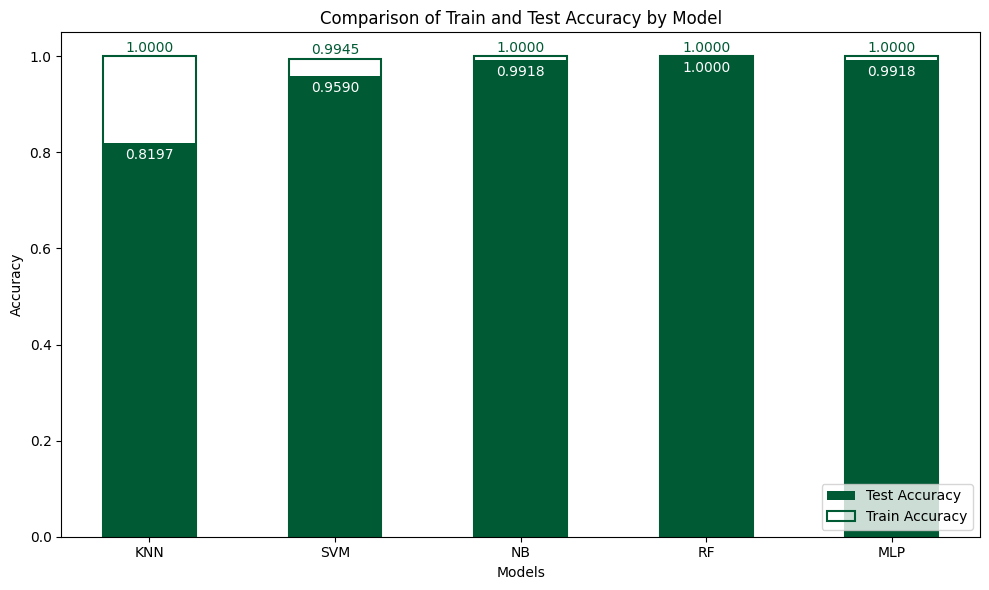

In [15]:
import matplotlib.pyplot as plt
import numpy as np

color = '#005A34'
models = ['KNN', 'SVM', 'NB', 'RF', 'MLP']

train_loss = [knn_train, svm_train, nb_train, rfc_train, mlp_train]
test_loss = [knn_test, svm_test, nb_test, rfc_test, mlp_test]

x = np.arange(len(models))  # the label locations

bar_width = 0.5

fig, ax = plt.subplots(figsize=(10, 6))

test_bars = ax.bar(x, test_loss, bar_width, label='Test Accuracy', color=color)

train_bars = ax.bar(x, train_loss, bar_width, label='Train Accuracy', edgecolor=color, facecolor='none', linewidth=1.5)


ax.set_xlabel('Models')
ax.set_ylabel('Accuracy')
ax.set_title('Comparison of Train and Test Accuracy by Model')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()
ax.legend(loc='lower right')

# 在每个条形图上添加文本
for i in range(len(models)):
    ax.text(x[i], test_loss[i] - 0.01, f'{test_loss[i]:.4f}', ha='center', va='top', color='white')
    ax.text(x[i], train_loss[i] + 0.01, f'{train_loss[i]:.4f}', ha='center', color=color)

plt.tight_layout()
plt.show()
